In [1]:
"""
Jupyter notebook for antisolvent screening.
Solute of the system is 'glutaric acid'.
Solvent of the system is '1-Butanol'.
""";

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [3]:
# Solute properties
solute = {
    "temp_melt": 370.9,
    "enth_fus": 20.7,
    "file": "./cosmo_file/UD1078.cosmo",
    "name": "GLUTARIC_ACID",
}
# Solvent properties
solvent = {
    "temp_melt": 184.552,
    "enth_fus": 9372.16,
    "file": "./cosmo_file/UD34.cosmo",
    "name": "1-BUTANOL",
}

In [4]:
# Antisolvent properties
antisolvent = {
    "temp_melt": 298.7,
    "enth_fus": 11720,
    "file": "./cosmo_file/UD69.cosmo",
    "name": "ACETIC_ACID",
}

In [5]:
system = tc()
system.add_solute(**solute)
system.add_solvent(**solvent)
system.add_antisolvent(**antisolvent)
antisolv_calculator = ac(system, trace=True)

Initializing system...
Composition >> ([0.99835858 0.00164142 0.        ])
Composition >> ([9.98358601e-01 1.62498482e-03 1.64139881e-05])
Composition >> ([9.98358625e-01 1.60854751e-03 3.28275002e-05])
Composition >> ([9.98358649e-01 1.59211095e-03 4.92405449e-05])
Composition >> ([9.98358672e-01 1.57567514e-03 6.56531309e-05])
Composition >> ([9.98358695e-01 1.55924007e-03 8.20652667e-05])
Composition >> ([9.98358717e-01 1.54280572e-03 9.84769611e-05])
Composition >> ([9.98358740e-01 1.52637210e-03 1.14888223e-04])
Composition >> ([9.98358762e-01 1.50993919e-03 1.31299060e-04])
Composition >> ([9.98358784e-01 1.49350698e-03 1.47709482e-04])
Composition >> ([9.98358805e-01 1.47707547e-03 1.64119497e-04])
Composition >> ([9.98358826e-01 1.46064464e-03 1.80529113e-04])
Composition >> ([9.98358847e-01 1.44421450e-03 1.96938340e-04])
Composition >> ([9.98358868e-01 1.42778502e-03 2.13347186e-04])
Composition >> ([9.98358888e-01 1.41135620e-03 2.29755660e-04])
Composition >> ([9.98358908e-

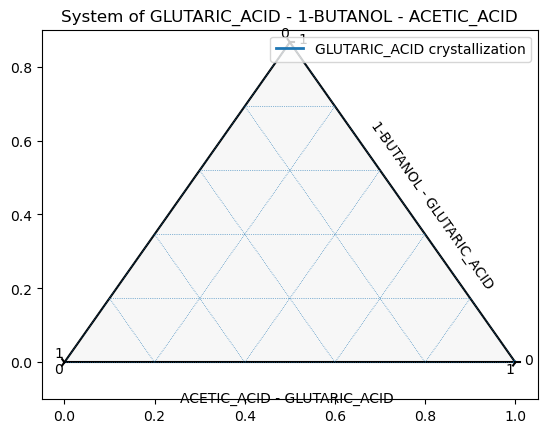

In [6]:
system.plot_ternary(antisolv_calculator.ternary_data)

AttributeError: 'AntisolventCalculate' object has no attribute '_calc_basis_mole'

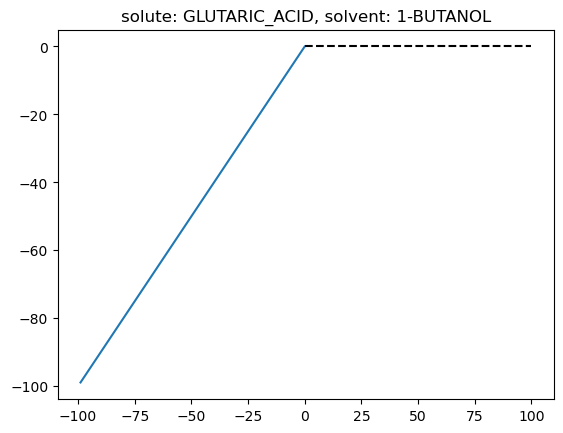

In [7]:
antisolv_calculator.plot_antisolv()

In [ ]:
# # Load antisolvent data
# with open("./data/antisolvent_properties.json", "r") as json_file:
#     antisolv_data = json.load(json_file)

In [ ]:
# system = tc()
# system.add_solute(**solute)
# system.add_solvent(**solvent)
# fig = plt.figure()
# plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
# for antisolvent in antisolv_data:
#     system.add_antisolvent(**antisolvent)
#     antisolv_calculator = ac(system, trace=False)
#     result = antisolv_calculator.get_data(
#         export="csv", file_name=f"./data/calculate_{antisolvent['name']}.csv"
#     )
#     plt.plot(
#         result["add_antisolv_mole"],
#         result["precip_mole"],
#         label=f"antisolvent: {system.mole_name[2]}",
#     )
#     system.clear_antisolvent()